In [1]:
import numpy as np
import tensorflow as tf
config = tf.compat.v1.ConfigProto(gpu_options =
                         tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
# device_count = {'GPU': 1}
)
# config.gpu_options.allow_growth = True
# session = tf.compat.v1.Session(config=config)
# tf.compat.v1.keras.backend.set_session(session)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
X = np.load("handsignX.npy")
y = np.load("handsigny.npy")

print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


In [3]:
# # Randomly shuffle the indices and select 200
# indices = np.random.choice(X.shape[0], 200, replace=False)  # Randomly select 200 indices

# # Create a subset of X and y using the random indices
# X_subset = X[indices, :]  # Select rows of X based on the random indices
# y_subset = y[indices]     # Select rows of y based on the same indices

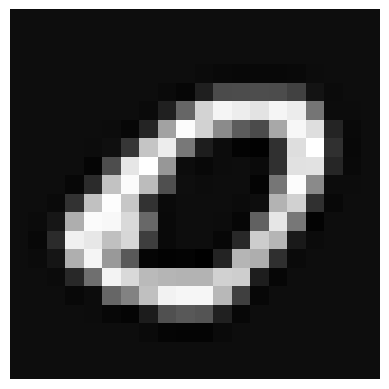

In [4]:
# Extract the image from the dataset
image = X[0]

# If the image is flattened (e.g., 784 pixels in a 1D array), reshape it to the original size
image = image.reshape(20, 20)

# Display the image
plt.imshow(image, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.axis('off')  # Optionally turn off axis
plt.show()

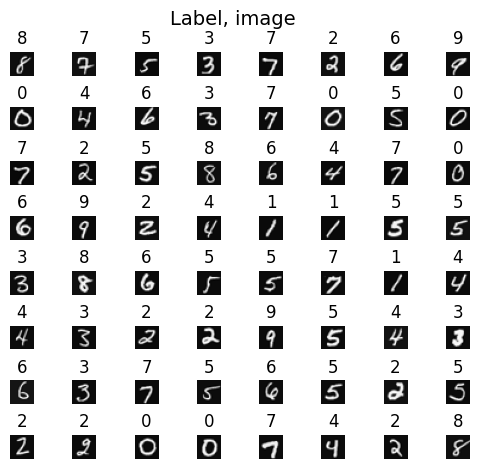

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [6]:
tf.random.set_seed(1234) # for consistent results

In [7]:
print(np.unique(y))

[0 1 2 3 4 5 6 7 8 9]


In [8]:
import numpy as np

img_array = np.load('handsignX.npy')
img_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape

(4000, 400)

In [11]:
X_test.shape

(1000, 400)

In [12]:
y_train.shape

(4000, 1)

In [13]:
y_test.shape

(1000, 1)

In [14]:
model=Sequential([
    Dense(units=25,activation='relu'),
    Dense(units=15,activation='relu'),
    Dense(units=10,activation='linear')
])

In [15]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import keras

In [16]:
from tensorflow.keras.optimizers import Adam

In [17]:
# from tensorflow.keras.optimizers.legacy import Adam

In [18]:
optimizer=keras.optimizers.Adam(learning_rate=1e-3)

In [19]:
model.compile(optimizer,loss=SparseCategoricalCrossentropy(from_logits=True))

In [20]:
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.0305
Epoch 2/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9398
Epoch 3/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5548
Epoch 4/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4226
Epoch 5/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3485
Epoch 6/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2995
Epoch 7/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2624
Epoch 8/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2339
Epoch 9/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2107
Epoch 10/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1912
Epoch 11/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1748
Epoch 12/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1604
Epoch 13/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1481
Epoch 14/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1373
Epoch 15/200
125/125 ━━━━━━━━━━━━━━━━━━━━ 0

In [21]:
prediction_logits=model.predict(X_test) #[0.022,0.256,.......] (rows=1000,columns=10)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [22]:
f_x=tf.nn.softmax(prediction_logits)

In [23]:
prediction_logits.shape

(1000, 10)

In [24]:
f_x.shape

TensorShape([1000, 10])

In [25]:
predicted_classes = np.argmax(f_x, axis=1) #[2,5,6,7,8,........] (1D array containing 1000 elements)
predicted_classes

array([3, 5, 5, 2, 1, 0, 1, 4, 4, 3, 4, 0, 1, 1, 6, 7, 3, 0, 3, 2, 1, 6,
       2, 1, 9, 1, 8, 0, 9, 0, 3, 0, 9, 9, 3, 5, 7, 8, 9, 4, 7, 8, 0, 0,
       1, 7, 7, 9, 6, 5, 9, 9, 4, 5, 2, 8, 2, 0, 3, 4, 4, 8, 8, 7, 0, 5,
       6, 4, 7, 9, 3, 0, 0, 0, 2, 4, 1, 5, 5, 7, 6, 6, 1, 3, 6, 4, 1, 1,
       9, 7, 8, 0, 0, 2, 0, 9, 5, 6, 0, 0, 3, 3, 4, 8, 0, 0, 1, 2, 9, 2,
       2, 2, 8, 1, 4, 9, 4, 4, 0, 4, 2, 2, 9, 0, 4, 9, 4, 9, 5, 6, 5, 6,
       3, 2, 7, 5, 8, 7, 1, 0, 7, 7, 9, 7, 8, 6, 5, 7, 5, 5, 2, 7, 9, 7,
       3, 0, 5, 5, 4, 0, 4, 6, 1, 2, 0, 7, 2, 3, 6, 4, 6, 3, 5, 6, 0, 6,
       8, 6, 0, 3, 9, 5, 3, 0, 5, 7, 7, 7, 1, 3, 1, 7, 7, 9, 4, 2, 1, 5,
       7, 8, 7, 1, 5, 8, 6, 4, 4, 6, 7, 1, 6, 1, 7, 4, 8, 0, 9, 0, 7, 2,
       3, 1, 0, 6, 2, 6, 5, 5, 0, 4, 8, 7, 2, 9, 0, 6, 6, 1, 5, 7, 1, 1,
       8, 8, 2, 3, 4, 2, 3, 9, 9, 8, 3, 2, 4, 1, 7, 4, 2, 1, 3, 4, 4, 8,
       2, 3, 4, 5, 5, 0, 1, 2, 9, 0, 3, 6, 2, 5, 7, 2, 9, 9, 1, 8, 3, 7,
       2, 6, 3, 1, 0, 5, 4, 2, 6, 1, 4, 4, 8, 2, 0,

In [26]:
# The prediction_classes array will contain the model's output (index) for each sample in test_data
#Accuracy is defined as the ratio of the number of correct predictions to the total number of predictions

In [27]:
true_classes = y_test.flatten()  # Flatten to shape (1000,) if needed

In [28]:
# Calculate accuracy
correct_predictions = np.sum(predicted_classes == true_classes)
total_predictions = true_classes.shape[0]  # Total number of actual classes

accuracy = correct_predictions / total_predictions
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 92.60%


###Create a test dataset by your team similar to the training dataset containing at least 200 examples (= 20 x 10, however, more is better). You may need to standardize the data before processing it further.

Show inference for one single test instance.

Test with your dataset and report the accuracy of your test dataset. Make sure to report per class accuracy.

In [29]:
from PIL import Image
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [30]:
def load_and_preprocess_images(dataset_dir):
    images = []
    labels = []

    # Loop over each digit folder (0 to 9)
    for label in range(10):
        label_folder = os.path.join(dataset_dir, str(label))

        # Loop over each image in the folder
        for filename in os.listdir(label_folder):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(label_folder, filename)
                img = Image.open(image_path).convert('L')  # Convert to grayscale

                img = img.resize((20, 20))


                img_array = np.array(img) / 255.0  # Normalize to [0, 1]

                # Center or pad
                coords = cv2.findNonZero(img_array)
                if coords is not None:
                    x, y, w, h = cv2.boundingRect(coords)
                    digit = img_array[y:y+h, x:x+w]
                    top = bottom = (20 - h) // 2
                    left = right = (20 - w) // 2
                    digit = cv2.copyMakeBorder(digit, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)
                else:
                    digit = img_array


                #digit = digit.reshape(28, 28, 1)  # Shape for grayscale
                images.append(digit)
                labels.append(label)  # Append the corresponding label (0-9)

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Loading and preprocessing images
dataset_dir = '/content/drive/MyDrive/dataset'
X_test_new, y_test_new = load_and_preprocess_images(dataset_dir)

In [33]:
len(X_test_new)

200

In [34]:
X_test_new.shape

(200, 20, 20)

In [35]:
y_test_new.shape

(200,)

In [36]:
X_test_new= X_test_new.reshape(200,20*20)
X_test_new.shape

(200, 400)

In [37]:
y_test_new=y_test_new.reshape(200,1)
y_test_new.shape

(200, 1)

In [38]:
keras.config.disable_traceback_filtering()

In [39]:
# x_rank = len(tf.shape(X_test_new))
# x_rank

In [40]:
X_test_new = X_test_new.astype('float32')

In [41]:
neww_logits = model.predict(X_test_new)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [42]:
# logits to probabilities using softmax
f_x_1 = tf.nn.softmax(neww_logits)

# predicted class for each image (the class with the highest probability)
predicted_classes_new = np.argmax(f_x_1, axis=1)

In [43]:
neww_logits.shape

(200, 10)

In [44]:
predicted_classes_new.shape

(200,)

In [45]:
true_classes_new=y_test_new.flatten()
true_classes_new.shape

(200,)

In [46]:
# Calculate accuracy
correct_predictions_new = np.sum(predicted_classes_new == true_classes_new)
total_predictions_new = true_classes_new.shape[0]  # Total number of actual classes

accuracy_new = correct_predictions_new / total_predictions_new
print(f'Accuracy: {accuracy_new * 100:.2f}%')


Accuracy: 12.50%


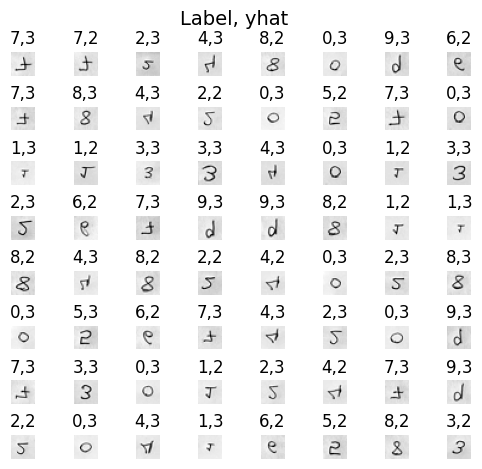

In [47]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_test_new.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_indexx = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshapedd = X_test_new[random_indexx].reshape((20,20)).T

    imgg = Image.fromarray(np.uint8(X_random_reshapedd * 255))  # Multiply by 255 to scale values from [0, 1] to [0, 255]
    # Rotate the image by n degrees
    rotated_imgg = imgg.rotate(90)


    # Display the image
    ax.imshow(rotated_imgg, cmap='gray')

    # Display the label above the image
    ax.set_title(f"{y_test_new[random_indexx, 0]},{predicted_classes_new[random_indexx]}")
    ax.set_axis_off()
    fig.suptitle("Label, yhat", fontsize=14)

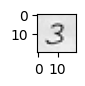

In [48]:
image_of_three = X_test_new[70]
fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
X_reshaped = image_of_three.reshape((20,20)).T

img = Image.fromarray(np.uint8(X_reshaped * 255))  # Multiply by 255 to scale values from [0, 1] to [0, 255]
# Rotate the image by n degrees
rotated_img = img.rotate(90)

# Display the image
ax.imshow(rotated_img, cmap='gray')
plt.show()
# prediction = model.predict(image_of_two.reshape(1,400))  # prediction
# print(f" predicting a Two: \n{prediction}")
# print(f" Largest Prediction index: {np.argmax(prediction)}")

# prediction_p = tf.nn.softmax(prediction)
# print(f" predicting a Two. Probability vector: \n{prediction_p}")
# print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

# yhat = np.argmax(prediction_p)
# print(f"np.argmax(prediction_p): {yhat}")